In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [6]:
data_path = "../../data/graphics"

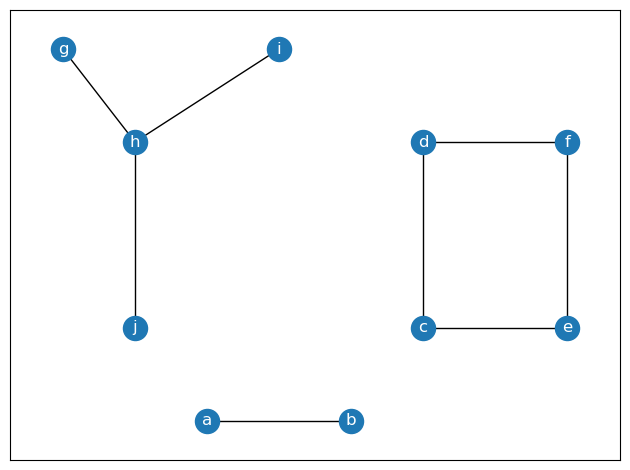

In [7]:
# Merging graph
graph = nx.Graph()
graph.add_edge("a", "b")

graph.add_edge("c", "d")
graph.add_edge("c", "e")
graph.add_edge("e", "f")
graph.add_edge("d", "f")

graph.add_edge("g", "h")
graph.add_edge("h", "i")
graph.add_edge("h", "j")

pos = {
    "a": (4, 1),
    "b": (6, 1),
    "c": (7, 2),
    "d": (7, 4),
    "e": (9, 2),
    "f": (9, 4),
    "g": (2, 5),
    "h": (3, 4),
    "i": (5, 5),
    "j": (3, 2),
}

nx.draw_networkx(
    graph,
    pos,
    arrows=False,
    with_labels=True,
    font_color="white"
)

plt.tight_layout()
plt.savefig(f"{data_path}/merging-graph.pdf")
plt.show()

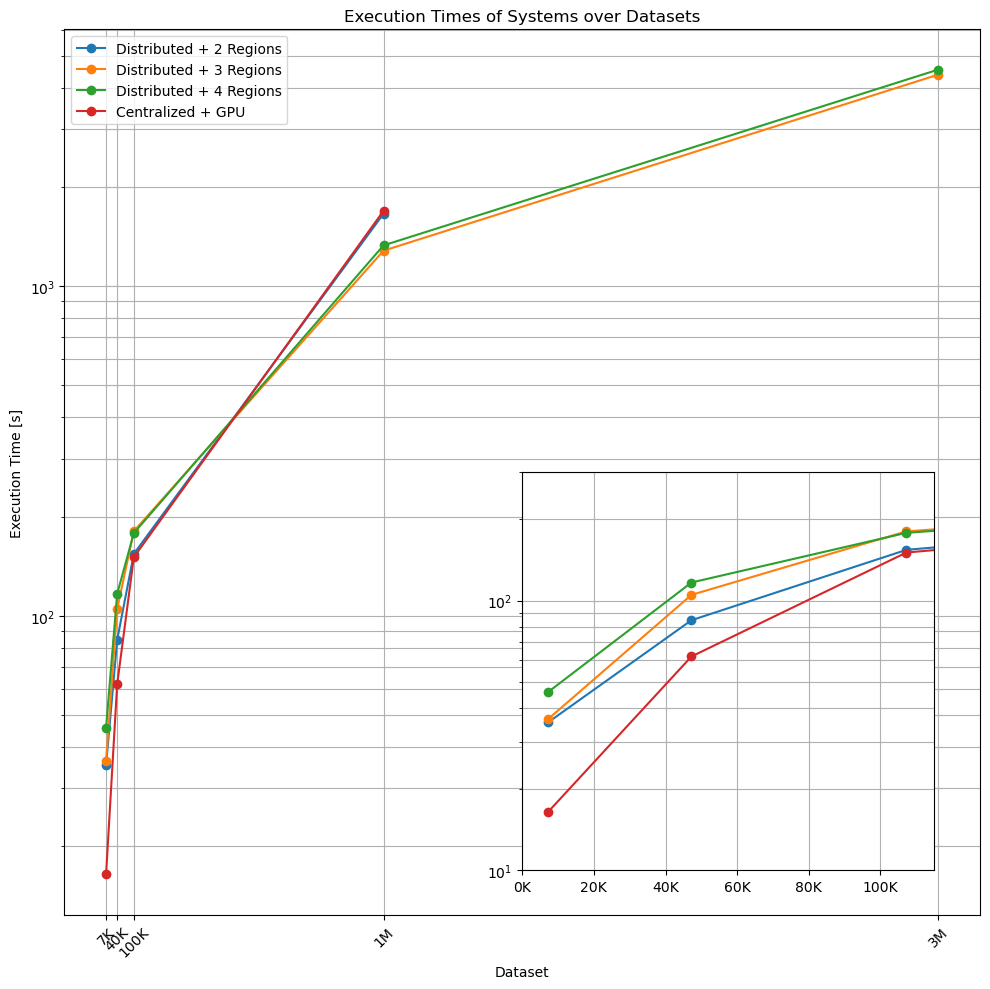

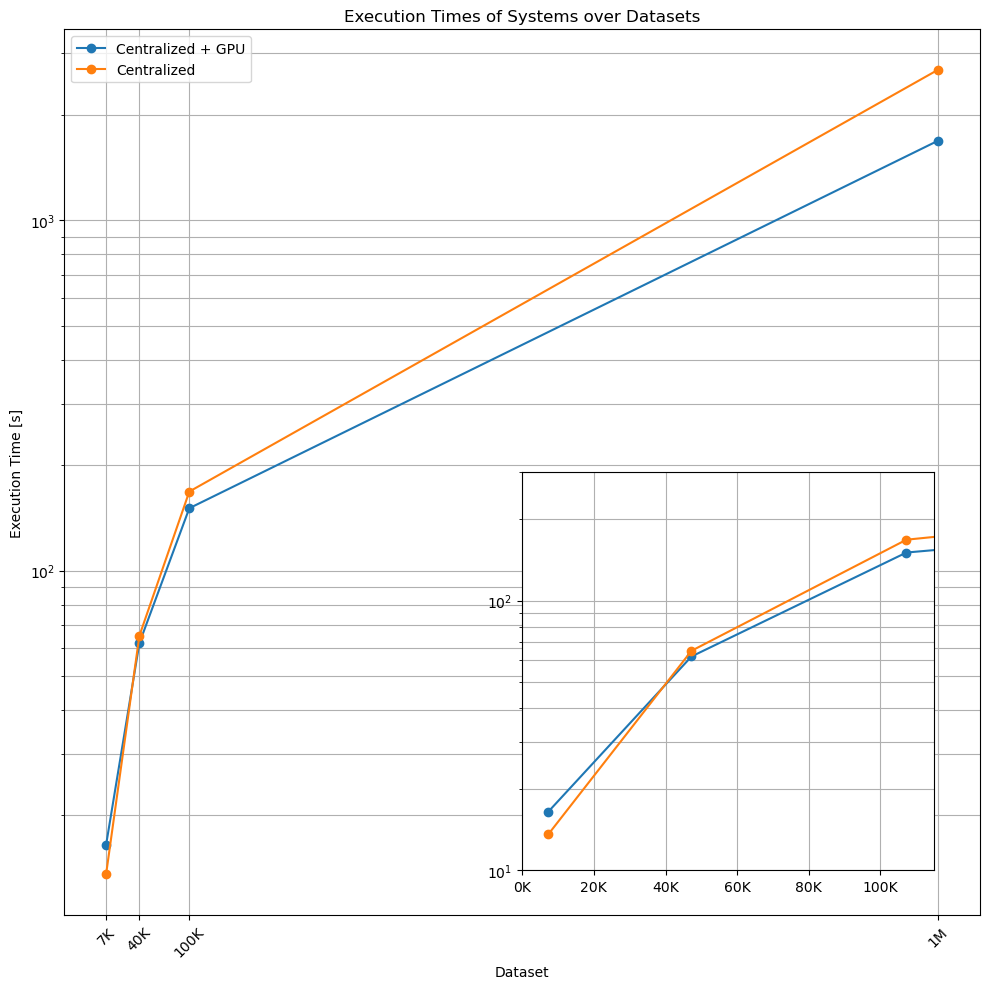

In [8]:
# Execution time graphs
datasets_sizes = np.array([7238, 47238, 107238, 1007238, 3007238])
datasets_names = ["7K", "40K", "100K", "1M", "3M"]
runtimes_of_systems = np.array([
    [35368.70198, 84587.025794, 154242.63664500002, 1657993.184991, np.nan],  # Distributed + 2 Regions
    [36367.887539999996, 105013.666811, 180632.23150999998, 1281081.62958, 4380728.7835],  # Distributed + 3 Regions
    [45820.907103, 116712.433875, 178352.144165, 1329365.263621, 4536668.839838],  # Distributed + 4 Regions
    [16467.020452, 62054.688222000004, 150746.750913, 1691636.798499, np.nan],  # Centralized + GPU
    [13574.851701, 65134.957679, 168201.91154499998, 2697742.925658, np.nan],  # Centralized
])  # ms
runtimes_of_systems /= 1000
systems = [
    "Distributed + 2 Regions",
    "Distributed + 3 Regions",
    "Distributed + 4 Regions",
    "Centralized + GPU",
    "Centralized"
]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for runtimes_of_system, system in zip(runtimes_of_systems[:-1], systems[:-1]):
    ax.plot(datasets_sizes, runtimes_of_system, marker="o", label=system)

ax_inset = ax.inset_axes(
    [0.5, 0.05, 0.45, 0.45],
    xlim=(0, 115000),
    ylim=(10, 300)
)
for runtimes_of_system in runtimes_of_systems[:-1]:
    ax_inset.plot(datasets_sizes, runtimes_of_system, marker="o")

ax_inset.set_yscale("log")
ax_inset.xaxis.set_major_formatter(lambda x, _: f"{x / 1000:.0f}K")
ax_inset.grid(True, which="both")

ax.set_xticks(ticks=datasets_sizes, labels=datasets_names, rotation=45)
ax.set_xlabel("Dataset")
ax.set_ylabel("Execution Time [s]")
ax.set_title("Execution Times of Systems over Datasets")
ax.set_yscale("log")
ax.legend()
ax.grid(True, which="both")

plt.tight_layout()
plt.savefig(f"{data_path}/execution-times-over-datasets.pdf")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for runtimes_of_system, system in zip(runtimes_of_systems[-2:], systems[-2:]):
    ax.plot(datasets_sizes[:-1], runtimes_of_system[:-1], marker="o", label=system)

ax_inset = ax.inset_axes(
    [0.5, 0.05, 0.45, 0.45],
    xlim=(0, 115000),
    ylim=(10, 300)
)
for runtimes_of_system in runtimes_of_systems[-2:]:
    ax_inset.plot(datasets_sizes[:-1], runtimes_of_system[:-1], marker="o")

ax_inset.set_yscale("log")
ax_inset.xaxis.set_major_formatter(lambda x, _: f"{x / 1000:.0f}K")
ax_inset.grid(True, which="both")

ax.set_xticks(ticks=datasets_sizes[:-1], labels=datasets_names[:-1], rotation=45)
ax.set_xlabel("Dataset")
ax.set_ylabel("Execution Time [s]")
ax.set_title("Execution Times of Systems over Datasets")
ax.set_yscale("log")
ax.legend()
ax.grid(True, which="both")

plt.tight_layout()
plt.savefig(f"{data_path}/centralized-execution-times-over-datasets.pdf")
plt.show()